匯入套件

In [2]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

plt.rcParams['font.family'] = ['Times New Roman']
English_fontcn = {'family': 'Times New Roman'}
Chinese_fontcn = {'family': 'DFKai-SB'}

讀檔

In [3]:
data = pd.read_csv('麥寮測站.csv') # 僅有10筆資料
data

,Time,PM10,Wind_Speed,Temperature,RH
0,2018/1/1 00:00,78,4.2,16.8,71
1,2018/1/1 01:00,71,3.2,16.7,71
2,2018/1/1 02:00,83,4.4,16.7,73
3,2018/1/1 03:00,70,3.5,16.7,74
4,2018/1/1 04:00,77,3.7,16.5,75
5,2018/1/1 05:00,95,4.3,16.3,76
6,2018/1/1 06:00,91,2.9,16.3,76
7,2018/1/1 07:00,85,3.8,16.6,76
8,2018/1/1 08:00,70,5.1,18.3,71
9,2018/1/1 09:00,69,6.4,19.5,69


# scikit-learn 套件

In [4]:
Eps = 4.5  # 圓半徑設定為4.5
Ms = 2  # 圓內最少樣本數設定為2

In [5]:
dbscan = DBSCAN(eps=Eps, min_samples=Ms)
data = data.iloc[:,1:].reset_index(drop=True)
dbscan.fit(data)
dist_list = dbscan.labels_

# 手刻套件

- 將樣本點A視為圓中心，並計算樣本點A和其他樣本點距離，若距離 ≤ Eps，代表此樣本點位置落在圓內

In [6]:
Find_core_points = []
Dataset = {}

for i in range(len(data)):
    Decide_core_points = []
    Circle_center_point = data.iloc[i,:].values
    Other_points = list(range(len(data)))
    Other_points.remove(i)
    Dataset[i] = 0
    for j in range(len(Other_points)):    
        Dist = math.dist(data.iloc[Other_points[j],:].values, Circle_center_point)
        if Dist <= Eps:
            Decide_core_points.append(Other_points[j])
    Find_core_points.append([i,*Decide_core_points])

- 圓內至少要有 Ms 個樣本點

In [7]:
Count_MS_Nums = list(filter(lambda x : len(x) >= Ms, Find_core_points))

In [8]:
Count_MS_Nums = list(map(lambda x : sorted(x), Count_MS_Nums))

- 刪除掉重複的資訊

In [9]:
k = 0

for i in range(len(Count_MS_Nums)):
    for j in range(len(Count_MS_Nums[i])):
        if Dataset[Count_MS_Nums[i][j]] == 0:
            Dataset[Count_MS_Nums[i][j]] = k+1
        if j > 0:
            if Dataset[Count_MS_Nums[i][j-1]] != 0:
                Dataset[Count_MS_Nums[i][j]] = Dataset[Count_MS_Nums[i][j-1]]            
    k += 1

In [10]:
dist_list  # scikit-learn 套件分群結果

array([0, 1, 2, 1, 0, 3, 3, 2, 1, 1], dtype=int64)

In [11]:
Cluster_values = labelencoder.fit_transform(list(Dataset.values()))  # 手刻套件分群結果
Cluster_values

array([0, 1, 2, 1, 0, 3, 3, 2, 1, 1], dtype=int64)

驗證scikit-learn和手刻套件的結果

- 透過混淆矩陣評估績效
- dist_list：scikit-learn 套件測試結果
- Cluster_values：手刻套件測試結果

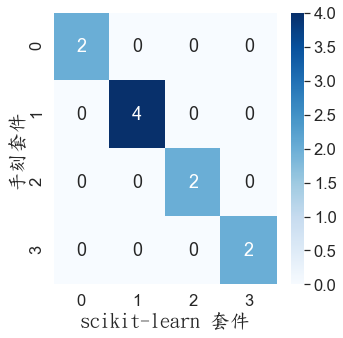

In [12]:
confusion_mtx = confusion_matrix(Cluster_values, dist_list) 
sns.set(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, cmap='Blues',annot=True, fmt='g')
plt.xlabel('scikit-learn 套件',fontsize=20,fontdict=Chinese_fontcn)
plt.ylabel('手刻套件',fontsize=20,fontdict=Chinese_fontcn)
plt.show() 